In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/paper2/washu_2021-2023_merged.shp')
df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5..."
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4..."
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4..."
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462..."
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7..."
...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691..."
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675..."
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7..."
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957..."


In [2]:
df = df.rename(columns={'Design Val':'Design Value'})

In [3]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [4]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [5]:
counties_conus = counties_conus.drop(["COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [6]:
counties_conus = counties_conus.to_crs(df.crs)

In [7]:
merged_df = df

In [8]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['abs_diff'] =  abs(merged_df['PM25_90th'] - merged_df['Design Value'])

merged_df['diff'].describe()

count    536.000000
mean       0.064832
std        1.227862
min       -5.333334
25%       -0.533333
50%        0.133334
75%        0.775000
max        5.733334
Name: diff, dtype: float64

In [9]:
# Define threshold
threshold = 9.0

# Function to classify each row
def classify(row):
    cdv = row['Design Value']
    cdve = row['PM25_90th']
    if cdv > threshold and cdve > threshold:
        return 'AP'
    elif cdv > threshold and cdve <= threshold:
        return 'NN'
    elif cdv <= threshold and cdve > threshold:
        return 'NP'
    else:
        return 'AN'

# Apply the classification
merged_df['classification'] = merged_df.apply(classify, axis=1)

# Print counts
print(merged_df['classification'].value_counts())

# Optional: filter into separate DataFrames
AP = merged_df[merged_df['classification'] == 'AP']
NP = merged_df[merged_df['classification'] == 'NP']
NN = merged_df[merged_df['classification'] == 'NN']
AN = merged_df[merged_df['classification'] == 'AN']

classification
AN    376
AP     63
NN     52
NP     45
Name: count, dtype: int64


In [10]:
import pandas as pd
dvs = pd.read_csv('/data/acker/EPA_DV/site_DVs_2021-2023.csv')
dvs

,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3)
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89
3,Alabama,Etowah,"Gadsden, AL",,4,10550010,Gadsden C. College,33.988210,-85.992556,NaN,8.8,8.38,8.20,9.82
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Puerto Rico,Fajardo,"San Juan-Carolina-Caguas, PR","San Juan-Carolina, PR",2,720530003,Fajardo,18.383983,-65.618888,NaN,7.1,7.20,7.20,6.86
1056,Puerto Rico,Guayama,"Guayama, PR","San Juan-Carolina, PR",2,720570012,,17.955378,-66.162122,NaN,5.6,7.02,4.17,NaN
1057,Puerto Rico,Guaynabo,"San Juan-Carolina-Caguas, PR","San Juan-Carolina, PR",2,720610005,Guaynabo,18.440095,-66.114460,NaN,7.5,8.00,7.54,7.06
1058,Puerto Rico,Ponce,"Ponce, PR","Ponce-Coamo-Santa Isabel, PR",2,721130004,Residential Area,18.009558,-66.627249,NaN,6.7,6.96,6.74,6.33


In [11]:
dvs.columns

Index(['State Name', 'County Name', 'CBSA Name', 'CSA Name', 'EPA Region',
       'AQS Site ID', 'Local Site Name', 'Site Latitude', 'Site Longitude',
       'Valid DV ', 'Invalid DV', '2021 Annual Mean Value (µg/m3)',
       '2022 Annual Mean Value (µg/m3)', '2023 Annual Mean Value (µg/m3)'],
      dtype='object')

In [12]:
import numpy as np
valid = dvs.dropna(subset=['Valid DV '])
valid

,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3)
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07
5,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10731005,Mcadory,33.331111,-87.003611,8.4,NaN,8.18,8.02,8.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,Sheridan,"Sheridan, WY",,8,560330002,Sheridan - Police Sta. Slam Site,44.815142,-106.955933,7.0,NaN,6.47,7.73,6.75
1047,Wyoming,Sublette,,,8,560350101,Pinedale Gaseous,42.869824,-109.870760,3.7,NaN,4.68,3.09,3.37
1050,Wyoming,Teton,"Jackson, WY-ID",,8,560391006,Jackson Slam Site,43.457760,-110.797990,3.1,NaN,4.94,2.74,1.71
1051,Wyoming,Teton,"Jackson, WY-ID",,8,560391013,Yellowstone National Park - Old Faithful Snow ...,44.373056,-110.830833,4.0,NaN,5.08,4.06,2.77


In [13]:
valid['geometry'] = gpd.points_from_xy(valid['Site Longitude'], valid['Site Latitude'])
valid = gpd.GeoDataFrame(valid, geometry="geometry", crs="EPSG:4269")
valid

/tmp/ipykernel_34677/3099035182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['geometry'] = gpd.points_from_xy(valid['Site Longitude'], valid['Site Latitude'])


,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3),geometry
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60,POINT (-87.88026 30.49748)
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10,POINT (-85.80361 33.28493)
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89,POINT (-85.96986 34.28857)
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07,POINT (-86.815 33.55306)
5,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10731005,Mcadory,33.331111,-87.003611,8.4,NaN,8.18,8.02,8.99,POINT (-87.00361 33.33111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,Sheridan,"Sheridan, WY",,8,560330002,Sheridan - Police Sta. Slam Site,44.815142,-106.955933,7.0,NaN,6.47,7.73,6.75,POINT (-106.95593 44.81514)
1047,Wyoming,Sublette,,,8,560350101,Pinedale Gaseous,42.869824,-109.870760,3.7,NaN,4.68,3.09,3.37,POINT (-109.87076 42.86982)
1050,Wyoming,Teton,"Jackson, WY-ID",,8,560391006,Jackson Slam Site,43.457760,-110.797990,3.1,NaN,4.94,2.74,1.71,POINT (-110.79799 43.45776)
1051,Wyoming,Teton,"Jackson, WY-ID",,8,560391013,Yellowstone National Park - Old Faithful Snow ...,44.373056,-110.830833,4.0,NaN,5.08,4.06,2.77,POINT (-110.83083 44.37306)


In [14]:
merged_df_2 = gpd.sjoin(valid, merged_df, how="left", predicate="within")
# Count monitors per county (assuming counties have a unique ID, like 'GEOID' or 'county_name')
monitor_counts = merged_df_2.groupby("GEOID").size().reset_index(name='monitor_count')
monitor_counts

,GEOID,monitor_count
0,01003,1
1,01027,1
2,01049,1
3,01073,5
4,01089,1
...,...,...
530,56025,1
531,56029,1
532,56033,1
533,56035,1


In [15]:
'''# Spatial join: assign each monitor to a county
merged_df_2 = gpd.sjoin(valid, merged_df, how="left", predicate="within")

# Group by county and aggregate
monitor_counts = (
    merged_df_2.groupby("GEOID")
    .agg(
        monitor_count=('geometry', 'size'),         # Count of monitors
        valid_dv_max=('Valid DV ', 'max')          # Example: max Valid DV per county
    )
    .reset_index()
)
monitor_counts'''

'# Spatial join: assign each monitor to a county\nmerged_df_2 = gpd.sjoin(valid, merged_df, how="left", predicate="within")\n\n# Group by county and aggregate\nmonitor_counts = (\n    merged_df_2.groupby("GEOID")\n    .agg(\n        monitor_count=(\'geometry\', \'size\'),         # Count of monitors\n        valid_dv_max=(\'Valid DV \', \'max\')          # Example: max Valid DV per county\n    )\n    .reset_index()\n)\nmonitor_counts'

In [16]:
# Merge monitor counts into counties GeoDataFrame
counties_with_monitor_counts = merged_df.merge(monitor_counts, on="GEOID", how="left")

# Fill NaNs (counties with 0 monitors)
counties_with_monitor_counts['monitor_count'] = counties_with_monitor_counts['monitor_count'].fillna(1).astype(int)
counties_with_monitor_counts

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,abs_diff,classification,monitor_count
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",2.233333,2.233333,AP,3
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",0.200000,0.200000,AP,1
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",-2.766666,2.766666,AP,1
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",5.733334,5.733334,NP,1
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",-3.600001,3.600001,AP,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",-0.966667,0.966667,AN,1
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",-0.700000,0.700000,AN,1
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",-0.766667,0.766667,AN,5
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",-0.443333,0.443333,AN,1


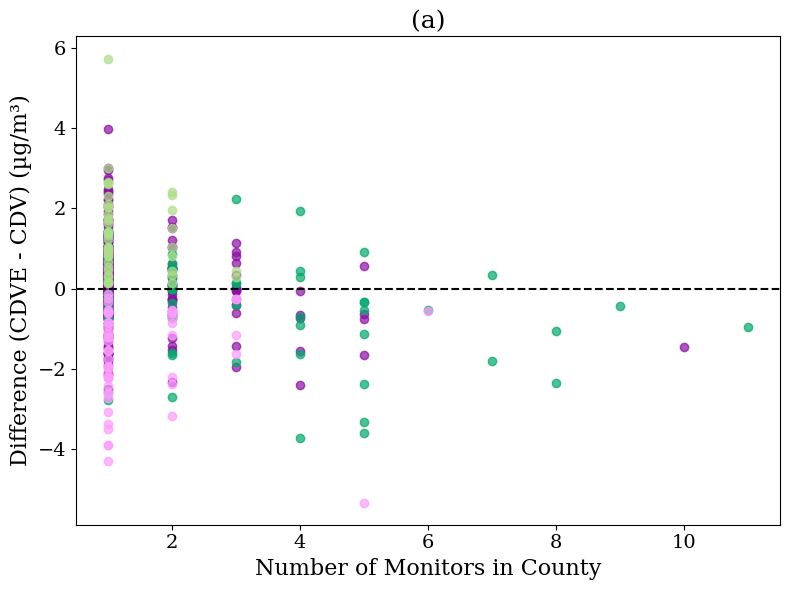

In [18]:
import matplotlib.pyplot as plt

# Color mapping
colors = {
    'AP': "#00A86B",
    'AN': "#8E0EA5",
    'NP': "#ACDF87",
    'NN': "#fe9bfe"
}

plt.figure(figsize=(8, 6))

# Grouped scatter by classification
for label, group in counties_with_monitor_counts.groupby('classification'):
    plt.scatter(
        group['monitor_count'],
        group['diff'],
        alpha=0.7,
        edgecolors=None,
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('Number of Monitors in County', fontsize=16)
plt.ylabel('Difference (CDVE - CDV) (µg/m³)', fontsize=16)
plt.title('(a)', fontsize=18)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.grid(False)
#plt.legend(title='Classification')
plt.tight_layout()
plt.show()


In [18]:
more_monitors = counties_with_monitor_counts[counties_with_monitor_counts['monitor_count'] > 1]
one_monitor = counties_with_monitor_counts[counties_with_monitor_counts['monitor_count'] <= 1]

In [19]:
mean_diff = counties_with_monitor_counts.groupby(['monitor_count', 'classification'])['diff'].mean()

# Optionally round and display
print(mean_diff.round(2))


monitor_count  classification
1              FN               -1.82
               FP                1.44
               TN                0.32
               TP               -0.19
2              FN               -1.28
               FP                1.22
               TN                0.05
               TP               -0.30
3              FN               -0.83
               FP                0.37
               TN               -0.07
               TP                0.05
4              TN               -1.09
               TP               -0.61
5              FN               -5.33
               TN               -0.63
               TP               -1.34
6              FN               -0.55
               TP               -0.53
7              TP               -0.73
8              TP               -1.71
9              TP               -0.43
10             TN               -1.47
11             TP               -0.97
Name: diff, dtype: float64


In [20]:
mean_diff = more_monitors.groupby(['classification'])['diff'].mean()
print(mean_diff.round(2))
mean_diff = one_monitor.groupby(['classification'])['diff'].mean()
print(mean_diff.round(2))

classification
FN   -1.38
FP    1.06
TN   -0.15
TP   -0.61
Name: diff, dtype: float64
classification
FN   -1.82
FP    1.44
TN    0.32
TP   -0.19
Name: diff, dtype: float64


In [21]:
mean_diff = more_monitors.groupby(['classification']).size()
print(mean_diff.round(2))
mean_diff = one_monitor.groupby(['classification']).size()
print(mean_diff.round(2))

classification
FN    16
FP    11
TN    58
TP    43
dtype: int64
classification
FN     36
FP     34
TN    318
TP     20
dtype: int64


In [22]:
mean_diff = more_monitors.groupby(['classification'])['abs_diff'].mean()
print(mean_diff.round(2))
mean_diff = one_monitor.groupby(['classification'])['abs_diff'].mean()
print(mean_diff.round(2))

classification
FN    1.38
FP    1.06
TN    0.71
TP    1.05
Name: abs_diff, dtype: float64
classification
FN    1.82
FP    1.44
TN    0.73
TP    0.79
Name: abs_diff, dtype: float64


In [23]:
more_monitors['abs_diff'].describe()

count    1.280000e+02
mean     9.388282e-01
std      9.097299e-01
min      1.907349e-07
25%      3.249998e-01
50%      6.249999e-01
75%      1.441666e+00
max      5.333334e+00
Name: abs_diff, dtype: float64

In [24]:
one_monitor['abs_diff'].describe()

count    408.000000
mean       0.885294
std        0.816219
min        0.000000
25%        0.300000
50%        0.666667
75%        1.233333
max        5.733334
Name: abs_diff, dtype: float64

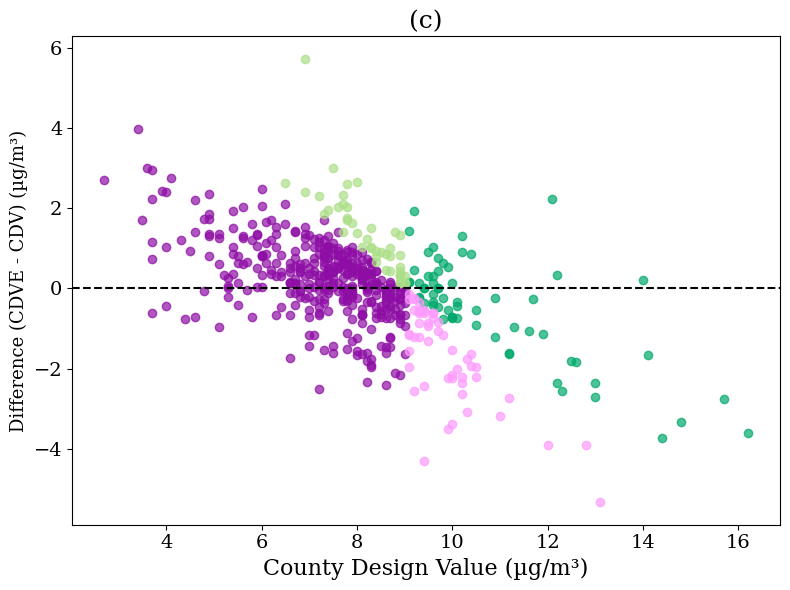

In [19]:
import matplotlib.pyplot as plt

# Define color mapping for classification
colors = {
    'AP': "#00A86B",
    'AN': "#8E0EA5",
    'NP': "#ACDF87",
    'NN': "#fe9bfe"
}
plt.figure(figsize=(8, 6))

# Plot grouped by classification
for label, group in counties_with_monitor_counts.groupby('classification'):
    plt.scatter(
        group['Design Value'],     # x-axis
        group['diff'],             # y-axis
        alpha=0.7,
        edgecolors=None,
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('County Design Value (µg/m³)', fontsize=16)
plt.ylabel('Difference (CDVE - CDV) (µg/m³)', fontsize=13)
plt.title('(c)', fontsize=18)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.grid(False)
#plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
#plt.legend(title='Classification')
plt.tight_layout()
plt.show()


In [26]:
from scipy.stats import pearsonr
pearsonr(counties_with_monitor_counts['Design Value'], counties_with_monitor_counts['diff'])  # where 'diff' = CDVE - CDV

PearsonRResult(statistic=-0.6018809902257736, pvalue=3.9515276078311745e-54)

In [27]:
# Define bins and labels
bins = [0, 7, 10, float('inf')]
labels = ['<7', '7–10', '>10']

# Create a new column for the CDV bin
counties_with_monitor_counts['cdv_bin'] = pd.cut(counties_with_monitor_counts['Design Value'], bins=bins, labels=labels, right=False)
mean_diff = counties_with_monitor_counts.groupby(['cdv_bin', 'classification'])['diff'].mean().round(2)
print("Mean difference (CDVE – CDV) by CDV bin and classification:")
print(mean_diff)


Mean difference (CDVE – CDV) by CDV bin and classification:
cdv_bin  classification
<7       FN                 NaN
         FP                3.59
         TN                0.82
         TP                 NaN
7–10     FN               -1.13
         FP                1.19
         TN               -0.03
         TP                0.20
>10      FN               -2.64
         FP                 NaN
         TN                 NaN
         TP               -1.06
Name: diff, dtype: float64


/tmp/ipykernel_2282/301768660.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diff = counties_with_monitor_counts.groupby(['cdv_bin', 'classification'])['diff'].mean().round(2)


In [28]:
# Count total counties per classification
class_totals = counties_with_monitor_counts['classification'].value_counts()

# Count how many of each classification fall into each bin
bin_counts = counties_with_monitor_counts.groupby(['classification', 'cdv_bin']).size()

# Calculate percent
bin_percent = (bin_counts / class_totals).round(4) * 100
print("\n% of each classification in each CDV bin:")
print(bin_percent)



% of each classification in each CDV bin:
classification  cdv_bin
FN              <7          0.00
                7–10       63.46
                >10        36.54
FP              <7          6.67
                7–10       93.33
                >10         0.00
TN              <7         32.18
                7–10       67.82
                >10         0.00
TP              <7          0.00
                7–10       46.03
                >10        53.97
dtype: float64


/tmp/ipykernel_2282/1027382030.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = counties_with_monitor_counts.groupby(['classification', 'cdv_bin']).size()


In [29]:
def pos_neg_percent(sub_df):
    total = len(sub_df)
    if total == 0:
        return pd.Series({'% Positive': 0, '% Negative': 0})
    pos = (sub_df['diff'] > 0).sum() / total * 100
    neg = (sub_df['diff'] < 0).sum() / total * 100
    return pd.Series({'% Positive': round(pos, 2), '% Negative': round(neg, 2)})

# Apply to each group
sign_stats = counties_with_monitor_counts.groupby(['cdv_bin', 'classification']).apply(pos_neg_percent)
print("\n% positive vs negative difference by CDV bin and classification:")
print(sign_stats)



% positive vs negative difference by CDV bin and classification:
                        % Positive  % Negative
cdv_bin classification                        
<7      FN                     NaN         NaN
        FP                  100.00        0.00
        TN                   81.82       18.18
        TP                     NaN         NaN
7–10    FN                    0.00      100.00
        FP                  100.00        0.00
        TN                   52.94       46.67
        TP                   58.62       41.38
>10     FN                    0.00      100.00
        FP                     NaN         NaN
        TN                     NaN         NaN
        TP                   20.59       79.41


/tmp/ipykernel_2282/2151982806.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sign_stats = counties_with_monitor_counts.groupby(['cdv_bin', 'classification']).apply(pos_neg_percent)
/tmp/ipykernel_2282/2151982806.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sign_stats = counties_with_monitor_counts.groupby(['cdv_bin', 'classification']).apply(pos_neg_percent)


In [30]:
# Reproject to an equal-area CRS (if not already)
counties_with_monitor_counts = counties_with_monitor_counts.to_crs(epsg=5070)

# Compute area in square kilometers
counties_with_monitor_counts['area_km2'] = counties_with_monitor_counts.geometry.area / 1e6
counties_with_monitor_counts = counties_with_monitor_counts.to_crs(epsg=4269)

In [31]:
counties_with_monitor_counts['area_km2'].describe()

count      536.000000
mean      3453.904193
std       5349.635168
min         33.639654
25%       1185.312728
50%       1812.488781
75%       3044.733255
max      64681.948478
Name: area_km2, dtype: float64

In [32]:
FN = counties_with_monitor_counts[counties_with_monitor_counts['classification'] == 'FN']

In [33]:
FN.columns

Index(['index', 'GEOID', 'PM25_90th', 'STATEFP', 'COUNTYFP', 'CDVE_rank', 'ID',
       'Design Value', 'geometry', 'diff', 'abs_diff', 'classification',
       'monitor_count', 'cdv_bin', 'area_km2'],
      dtype='object')

In [34]:
FN['area_km2'].describe()

count       52.000000
mean      5256.017985
std       8566.761936
min        269.634135
25%       1325.289995
50%       2000.140143
75%       6629.582125
max      52074.133864
Name: area_km2, dtype: float64

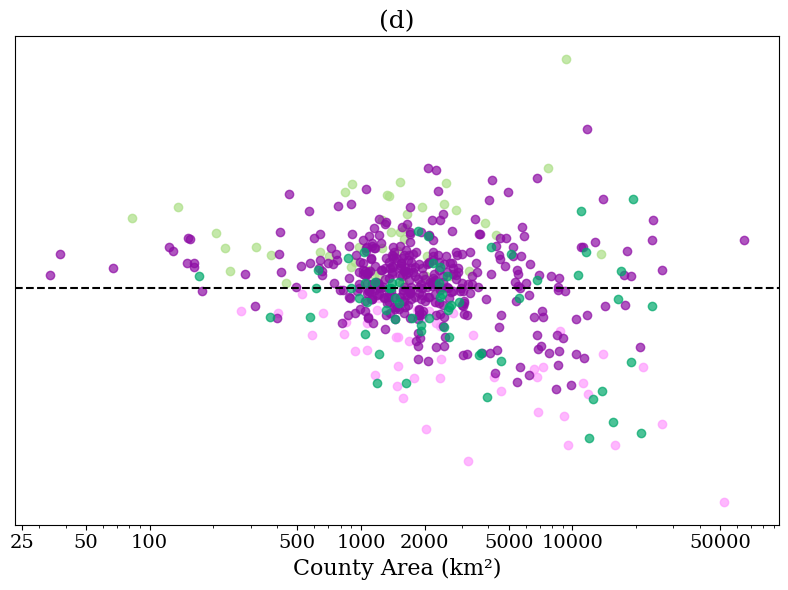

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Define color mapping
colors = {
    'TP': "#00A86B",
    'TN': "#8E0EA5",
    'FP': "#ACDF87",
    'FN': "#fe9bfe"
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in counties_with_monitor_counts.groupby('classification'):
    plt.scatter(
        group['area_km2'],         # x-axis
        group['diff'],             # y-axis
        alpha=0.7,
        edgecolors=None,
        label=label,
        color=colors.get(label, 'gray')
    )

# Reference line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Apply log scale on x-axis to spread small counties
plt.xscale('log')
plt.rcParams["font.family"] = "serif"


# Set custom ticks and labels
xticks = [25, 50, 100, 500, 1000, 2000, 5000, 10000, 50000]
xtick_labels = ['25', '50', '100', '500', '1000', '2000', '5000', '10000', '50000']
plt.xticks(xticks, xtick_labels)

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('County Area (km²)', fontsize=16)
#plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=16)
plt.xticks(fontsize=14)
plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
# Horizontal legend below
import matplotlib.lines as mlines
legend_order = ['TP', 'TN', 'FP', 'FN']
legend_handles = [
    mlines.Line2D([], [], color=colors[label], marker='o', linestyle='None',
                  markersize=7, markeredgecolor=None, label=label)
    for label in legend_order
]

'''plt.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=4,
    frameon=False,
    fontsize=12
)'''
plt.title('(d)', fontsize=18)

plt.tight_layout()
plt.show()


In [36]:
# Split counties into large and small
large = counties_with_monitor_counts[counties_with_monitor_counts['area_km2'] > 5000]
small = counties_with_monitor_counts[counties_with_monitor_counts['area_km2'] <= 5000]

# Helper function to compute differences
def compute_differences(df, label):
    print(f"\n--- {label} Counties ---")
    
    # Absolute mean difference for groups
    abs_mean_all = df['diff'].abs().mean()
    abs_mean_disagreement = df[df['classification'].isin(['FP', 'FN'])]['diff'].abs().mean()
    abs_mean_agreement = df[df['classification'].isin(['TP', 'TN'])]['diff'].abs().mean()
    
    print(f"Absolute mean diff (All counties): {abs_mean_all:.3f}")
    print(f"Absolute mean diff (Disagreement - FP/FN): {abs_mean_disagreement:.3f}")
    print(f"Absolute mean diff (Agreement - TP/TN): {abs_mean_agreement:.3f}\n")
    
    # Signed mean difference for each classification
    for cls in ['TP', 'TN', 'FP', 'FN']:
        subset = df[df['classification'] == cls]
        if not subset.empty:
            mean_diff = subset['diff'].mean()
            print(f"{cls}: Mean diff = {mean_diff:.3f}")
        else:
            print(f"{cls}: No data")

# Compute for large and small counties
compute_differences(large, "Large (>5000 km²)")
compute_differences(small, "Small (<=5000 km²)")



--- Large (>5000 km²) Counties ---
Absolute mean diff (All counties): 1.493
Absolute mean diff (Disagreement - FP/FN): 2.833
Absolute mean diff (Agreement - TP/TN): 1.177

TP: Mean diff = -0.742
TN: Mean diff = -0.108
FP: Mean diff = 3.200
FN: Mean diff = -2.755

--- Small (<=5000 km²) Counties ---
Absolute mean diff (All counties): 0.780
Absolute mean diff (Disagreement - FP/FN): 1.250
Absolute mean diff (Agreement - TP/TN): 0.677

TP: Mean diff = -0.391
TN: Mean diff = 0.306
FP: Mean diff = 1.214
FN: Mean diff = -1.289


In [37]:
counties_with_monitor_counts['area_km2'].max()

64681.94847794326

In [38]:
counties_with_monitor_counts['area_km2'].quantile(0.9)

8130.3332665843445

In [42]:
# Total number of counties < 10,000 km²
total_under_threshold = (counties_with_monitor_counts['area_km2'] < 8_130).sum()

print(f"Total number of counties with area < 8,130 km²: {total_under_threshold}")


Total number of counties with area < 8,130 km²: 482


In [43]:
# Define the threshold
threshold = 8_130  # in km²

# Create a helper function to count below/above threshold
def count_area_by_classification(df, threshold):
    summary = df.groupby('classification').apply(
        lambda g: pd.Series({
            f"< {threshold} km²": (g['area_km2'] < threshold).sum(),
            f"≥ {threshold} km²": (g['area_km2'] >= threshold).sum()
        })
    )
    return summary

# Run the function on your DataFrame
area_counts = count_area_by_classification(counties_with_monitor_counts, threshold)

# Display results
print("Number of counties by classification and area category:")
print(area_counts)


Number of counties by classification and area category:
                < 8130 km²  ≥ 8130 km²
classification                        
FN                      42          10
FP                      43           2
TN                     347          29
TP                      50          13


/tmp/ipykernel_9222/2567375348.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('classification').apply(


In [41]:
removed = gpd.read_file('/data/acker/ALA/paper2/GL_removed_pixels_2021-2023_grids.shp')
removed

,removed,lat,lon,geometry
0,93.502815,14.195000,-90.525002,"POLYGON ((-90.525 14.195, -90.525 14.205, -90...."
1,102.857147,14.195000,-90.514999,"POLYGON ((-90.515 14.195, -90.515 14.205, -90...."
2,102.586212,14.195000,-90.504997,"POLYGON ((-90.505 14.195, -90.505 14.205, -90...."
3,97.159096,14.195000,-90.495003,"POLYGON ((-90.495 14.195, -90.495 14.205, -90...."
4,91.258743,14.205000,-90.574997,"POLYGON ((-90.575 14.205, -90.575 14.215, -90...."
...,...,...,...,...
2998275,1004.444397,67.985001,-50.055000,"POLYGON ((-50.055 67.985, -50.055 67.995, -50...."
2998276,1023.333313,67.985001,-50.044998,"POLYGON ((-50.045 67.985, -50.045 67.995, -50...."
2998277,1023.333313,67.985001,-50.035000,"POLYGON ((-50.035 67.985, -50.035 67.995, -50...."
2998278,1029.444458,67.985001,-50.025002,"POLYGON ((-50.025 67.985, -50.025 67.995, -50...."


In [42]:
rem_counties = gpd.sjoin(removed, counties_with_monitor_counts, how='inner', predicate='intersects')
rem_counties

,removed,lat,lon,geometry,index_right0,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,diff,abs_diff,classification,monitor_count,cdv_bin,area_km2
6954,104.647438,19.395000,-155.604996,"POLYGON ((-155.605 19.395, -155.605 19.405, -1...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,0.766667,TN,5,<7,10446.210516
6955,93.888893,19.395000,-155.595001,"POLYGON ((-155.595 19.395, -155.595 19.405, -1...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,0.766667,TN,5,<7,10446.210516
6956,91.875000,19.405001,-155.634995,"POLYGON ((-155.63499 19.405, -155.63499 19.415...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,0.766667,TN,5,<7,10446.210516
6957,93.333336,19.405001,-155.625000,"POLYGON ((-155.625 19.405, -155.625 19.415, -1...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,0.766667,TN,5,<7,10446.210516
6958,93.333336,19.405001,-155.615005,"POLYGON ((-155.61501 19.405, -155.61501 19.415...",533,533,15001,3.633333,15,001,3133,15_001,4.4,-0.766667,0.766667,TN,5,<7,10446.210516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899193,90.797546,65.205002,-147.994995,"POLYGON ((-147.995 65.205, -147.995 65.215, -1...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,2.233333,TP,3,>10,19256.197000
1899194,91.411041,65.205002,-147.985001,"POLYGON ((-147.985 65.205, -147.985 65.215, -1...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,2.233333,TP,3,>10,19256.197000
1899195,93.827148,65.205002,-147.975006,"POLYGON ((-147.97501 65.205, -147.97501 65.215...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,2.233333,TP,3,>10,19256.197000
1899196,92.024544,65.205002,-147.964996,"POLYGON ((-147.965 65.205, -147.965 65.215, -1...",0,0,02090,14.333333,02,090,1,02_090,12.1,2.233333,2.233333,TP,3,>10,19256.197000


In [43]:
total_removed_per_county = rem_counties.groupby('GEOID').size().reset_index(name='removed_grids')
final_df_1 = counties_with_monitor_counts.merge(total_removed_per_county, on='GEOID', how='left')
final_df_1

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,abs_diff,classification,monitor_count,cdv_bin,area_km2,removed_grids
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",2.233333,2.233333,TP,3,>10,19256.197000,4254.0
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",0.200000,0.200000,TP,1,>10,6768.596620,636.0
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",-2.766666,2.766666,TP,1,>10,12531.451358,1365.0
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",5.733334,5.733334,FP,1,<7,9351.972148,680.0
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00307 35.7...",-3.600001,3.600001,TP,5,>10,21146.912928,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",-0.966667,0.966667,TN,1,<7,4476.989197,3534.0
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",-0.700000,0.700000,TN,1,<7,7283.890229,7984.0
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",-0.766667,0.766667,TN,5,<7,10446.210516,72.0
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",-0.443333,0.443333,TN,1,<7,3021.741676,141.0


In [64]:
final_df_1['removed_grids'].describe()

count      178.000000
mean       811.421348
std       3494.572333
min          1.000000
25%         26.000000
50%        109.000000
75%        542.250000
max      44091.000000
Name: removed_grids, dtype: float64

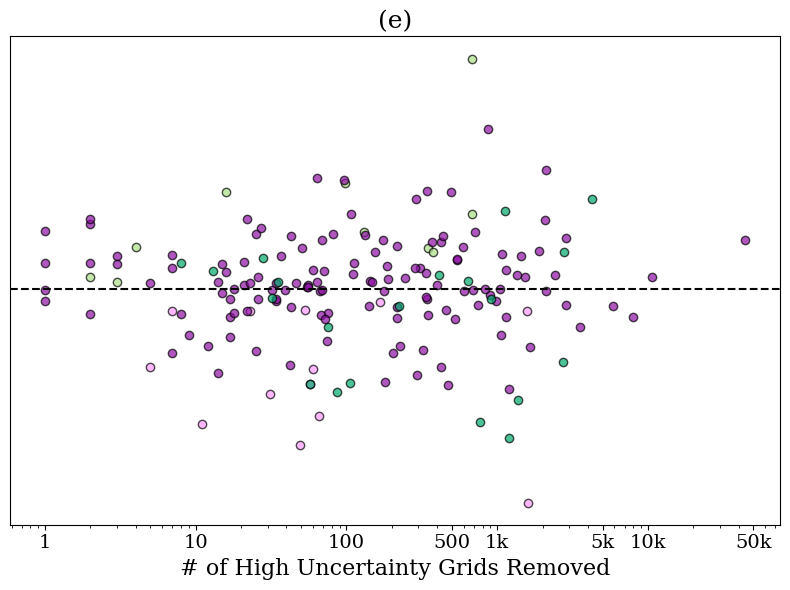

In [ ]:
import matplotlib.pyplot as plt

# Define color mapping
colors = {
    'TP': "#00A86B",
    'TN': "#8E0EA5",
    'FP': "#ACDF87",
    'FN': "#fe9bfe"
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in final_df_1.groupby('classification'):
    plt.scatter(
        group['removed_grids'],         # x-axis
        group['diff'],                  # y-axis
        alpha=0.7,
        edgecolors=None,
        label=label,
        color=colors.get(label, 'gray')
    )

# Reference line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Apply log scale on x-axis
plt.xscale('log')
plt.rcParams["font.family"] = "serif"


# Set custom ticks and labels
xticks = [1,10, 100, 500, 1000, 5000, 10000, 50000]
xtick_labels = ['1','10', '100', '500', '1k', '5k', '10k', '50k']
plt.xticks(xticks, xtick_labels, fontsize=14)

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('# of High Uncertainty Grids Removed', fontsize=16)
plt.title('(e)', fontsize=18)
plt.grid(False)
plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Optional: legend (currently commented out)
'''
plt.legend(
    title='Classification',
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=4,
    frameon=False
)
'''

plt.tight_layout()
plt.show()


In [45]:
print((final_df_1['removed_grids'] == 0).sum(), "counties with 0 removed grids")
print((final_df_1['removed_grids'] < 100).sum(), "counties with < 100 removed")
print((final_df_1['removed_grids'] < 1000).sum(), "counties with < 1,000 removed")
print((final_df_1['removed_grids'] >= 1000).sum(), "counties with ≥ 1,000 removed")
print((final_df_1['removed_grids'] >= 5000).sum(), "counties with ≥ 5,000 removed")
print((final_df_1['removed_grids'] >= 10000).sum(), "counties with ≥ 10,000 removed")


0 counties with 0 removed grids
87 counties with < 100 removed
148 counties with < 1,000 removed
30 counties with ≥ 1,000 removed
4 counties with ≥ 5,000 removed
2 counties with ≥ 10,000 removed


In [46]:
import pandas as pd

# Define bins and labels
bins = [0, 100, 1000, 5000, float('inf')]
labels = ['<100', '100–999', '1,000–4,999', '≥5,000']

# Bin the data
final_df_1['removed_bin'] = pd.cut(final_df_1['removed_grids'], bins=bins, labels=labels, right=False)

# Calculate overall absolute mean difference by bin
mean_diff = final_df_1.groupby('removed_bin')['abs_diff'].mean().round(2)
print("Absolute mean difference by removed grid bin:")
print(mean_diff)

# Classification counts per bin
classification_counts = final_df_1.groupby(['removed_bin', 'classification']).size().unstack(fill_value=0)
print("\nClassification counts per removed grid bin:")
print(classification_counts)

# Absolute mean difference by classification per bin
abs_mean_by_class = final_df_1.groupby(['removed_bin', 'classification'])['abs_diff'].mean().round(2)
abs_mean_by_class_table = abs_mean_by_class.unstack()
print("\nAbsolute mean difference by classification and removed grid bin:")
print(abs_mean_by_class_table)


Absolute mean difference by removed grid bin:
removed_bin
<100           0.96
100–999        1.07
1,000–4,999    1.40
≥5,000         0.66
Name: abs_diff, dtype: float64

Classification counts per removed grid bin:
classification  FN  FP  TN  TP
removed_bin                   
<100            10   5  64   8
100–999          1   5  49   6
1,000–4,999      2   0  18   6
≥5,000           0   0   4   0

Absolute mean difference by classification and removed grid bin:
classification    FN    FP    TN    TP
removed_bin                           
<100            2.11  1.31  0.75  1.02
100–999         0.33  2.18  0.97  1.15
1,000–4,999     2.94   NaN  0.96  2.23
≥5,000           NaN   NaN  0.66   NaN


/tmp/ipykernel_593685/968441416.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_diff = final_df_1.groupby('removed_bin')['abs_diff'].mean().round(2)
/tmp/ipykernel_593685/968441416.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  classification_counts = final_df_1.groupby(['removed_bin', 'classification']).size().unstack(fill_value=0)
/tmp/ipykernel_593685/968441416.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

In [16]:
df = gpd.read_file('/data/acker/ALA/paper2/GL_2021-2023_grids.shp')
df

,value,lat,lon,geometry
0,15.533333,10.005000,-85.724998,"POLYGON ((-85.725 10.005, -85.725 10.015, -85...."
1,15.666667,10.005000,-85.714996,"POLYGON ((-85.715 10.005, -85.715 10.015, -85...."
2,15.666667,10.005000,-85.705002,"POLYGON ((-85.705 10.005, -85.705 10.015, -85...."
3,14.700000,10.005000,-85.695000,"POLYGON ((-85.695 10.005, -85.695 10.015, -85...."
4,14.266666,10.005000,-85.684998,"POLYGON ((-85.685 10.005, -85.685 10.015, -85...."
...,...,...,...,...
25002341,1.400000,67.985001,-51.395000,"POLYGON ((-51.395 67.985, -51.395 67.995, -51...."
25002342,1.400000,67.985001,-51.384998,"POLYGON ((-51.385 67.985, -51.385 67.995, -51...."
25002343,1.400000,67.985001,-51.375000,"POLYGON ((-51.375 67.985, -51.375 67.995, -51...."
25002344,1.400000,67.985001,-51.355000,"POLYGON ((-51.355 67.985, -51.355 67.995, -51...."


In [17]:
df = df.to_crs(epsg=4269)

In [18]:
joined = gpd.sjoin(df, counties_with_monitor_counts, how='left', predicate='intersects')
joined

,value,lat,lon,geometry,index_right0,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,diff,abs_diff,classification,monitor_count
0,15.533333,10.005000,-85.724998,"POLYGON ((-85.725 10.005, -85.725 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.666667,10.005000,-85.714996,"POLYGON ((-85.715 10.005, -85.715 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.666667,10.005000,-85.705002,"POLYGON ((-85.705 10.005, -85.705 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.700000,10.005000,-85.695000,"POLYGON ((-85.695 10.005, -85.695 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.266666,10.005000,-85.684998,"POLYGON ((-85.685 10.005, -85.685 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25002341,1.400000,67.985001,-51.395000,"POLYGON ((-51.395 67.985, -51.395 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002342,1.400000,67.985001,-51.384998,"POLYGON ((-51.385 67.985, -51.385 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002343,1.400000,67.985001,-51.375000,"POLYGON ((-51.375 67.985, -51.375 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002344,1.400000,67.985001,-51.355000,"POLYGON ((-51.355 67.985, -51.355 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
grids = joined.dropna(subset=['value','GEOID'])

In [20]:
grids = grids.drop(columns=['index_right0'])

In [21]:
monitors_with_grid = gpd.sjoin(valid, grids, how="inner", predicate="within")

# Now each monitor has the grid cell + county info it falls within


In [22]:
total_grids_per_county = grids.groupby('GEOID').size().reset_index(name='total_grids')


In [23]:
# Keep unique grid geometries with monitors
grids_with_monitor = monitors_with_grid.drop_duplicates(subset='geometry')

# Count how many unique grid cells have a monitor in each county
monitor_grids_per_county = grids_with_monitor.groupby('GEOID').size().reset_index(name='grids_with_monitor')


In [24]:
coverage_df = total_grids_per_county.merge(monitor_grids_per_county, on='GEOID', how='left')
coverage_df['grids_with_monitor'] = coverage_df['grids_with_monitor'].fillna(0)

coverage_df['monitor_coverage_pct'] = 100 * coverage_df['grids_with_monitor'] / coverage_df['total_grids']


In [25]:
coverage_df['monitor_coverage_pct'].describe()

count    536.000000
mean       0.102089
std        0.176742
min        0.000000
25%        0.035047
50%        0.058360
75%        0.089646
max        1.746725
Name: monitor_coverage_pct, dtype: float64

In [26]:
final_df = counties_with_monitor_counts.merge(coverage_df, on='GEOID', how='left')

final_df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,abs_diff,classification,monitor_count,total_grids,grids_with_monitor,monitor_coverage_pct
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",2.233333,2.233333,TP,3,37073,3.0,0.008092
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",0.200000,0.200000,TP,1,7358,1.0,0.013591
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",-2.766666,2.766666,TP,1,12847,1.0,0.007784
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",5.733334,5.733334,FP,1,10107,1.0,0.009894
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",-3.600001,3.600001,TP,5,21363,5.0,0.023405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",-0.966667,0.966667,TN,1,4942,1.0,0.020235
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",-0.700000,0.700000,TN,1,5378,1.0,0.018594
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",-0.766667,0.766667,TN,5,9120,5.0,0.054825
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",-0.443333,0.443333,TN,1,2784,1.0,0.035920


In [27]:
final_df['monitor_coverage_pct'].describe()

count    536.000000
mean       0.102089
std        0.176742
min        0.000000
25%        0.035047
50%        0.058360
75%        0.089646
max        1.746725
Name: monitor_coverage_pct, dtype: float64

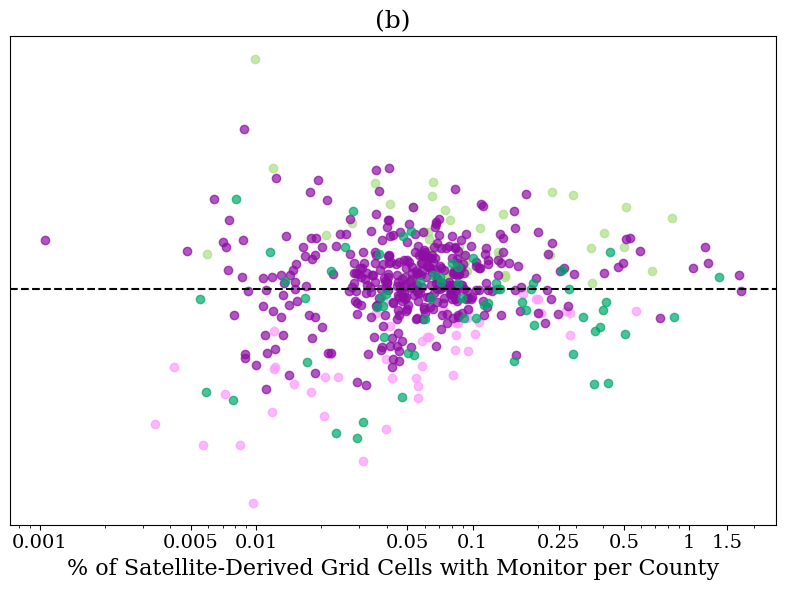

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define color mapping for classification
colors = {
    'TP': "#00A86B",
    'TN': "#8E0EA5",
    'FP': "#ACDF87",
    'FN': "#fe9bfe"
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in final_df.groupby('classification'):
    plt.scatter(
        group['monitor_coverage_pct'],  # x-axis
        group['diff'],                  # y-axis
        alpha=0.7,
        edgecolors=None,
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Apply strict log scale on x-axis
plt.xscale('log')

# Set custom x-ticks and labels
xticks = [0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 1.5]
xtick_labels = ['0.001', '0.005','0.01', '0.05', '0.1', '0.25', '0.5', '1', '1.5']
plt.xticks(xticks, xtick_labels)

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('% of Satellite-Derived Grid Cells with Monitor per County', fontsize=16)
#plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=16)
plt.gca().tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

plt.title('(b)', fontsize=18)
plt.grid(False)

# Add legend
import matplotlib.lines as mlines
legend_order = ['TP', 'TN', 'FP', 'FN']
legend_handles = [
    mlines.Line2D([], [], color=colors[label], marker='o', linestyle='None',
                  markersize=7, markeredgecolor=None, label=label)
    for label in legend_order
]
'''plt.legend(
    handles=legend_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=4,
    frameon=False,
    fontsize=12
)'''

plt.tight_layout()
plt.show()


In [71]:
final_df[final_df['monitor_coverage_pct'] < 0.05]['diff'].describe()

count    228.000000
mean      -0.125395
std        1.535721
min       -5.333334
25%       -0.941667
50%        0.033333
75%        0.800000
max        5.733334
Name: diff, dtype: float64

In [70]:
import pandas as pd

# Define bins and labels
bins = [0, 0.05, 0.10, float('inf')]
labels = ['<0.05', '0.05–0.10', '>0.10']

# Create a new column for coverage bin
final_df['coverage_bin'] = pd.cut(final_df['monitor_coverage_pct'], bins=bins, labels=labels, right=False)

# Calculate mean and median difference by bin
summary_stats = final_df.groupby('coverage_bin')['abs_diff'].agg(['mean', 'median']).round(2)
print("Mean and median difference by monitor coverage bin:")
print(summary_stats)

# Count classification types in each bin
classification_counts = final_df.groupby(['coverage_bin', 'classification']).size().unstack(fill_value=0)
print("\nClassification counts by monitor coverage bin:")
print(classification_counts)
# Mean difference by classification per bin
mean_by_class = final_df.groupby(['coverage_bin', 'classification'])['abs_diff'].mean().round(2)

# Optional: reshape into a more readable table
mean_by_class_table = mean_by_class.unstack()
print("Mean difference (CDVE – CDV) by classification and monitor coverage bin:")
print(mean_by_class_table)


Mean and median difference by monitor coverage bin:
              mean  median
coverage_bin              
<0.05         1.13    0.82
0.05–0.10     0.69    0.53
>0.10         0.78    0.63

Classification counts by monitor coverage bin:
classification  FN  FP   TN  TP
coverage_bin                   
<0.05            8  24  174  22
0.05–0.10       20  17  143  14
>0.10           17  11   59  27
Mean difference (CDVE – CDV) by classification and monitor coverage bin:
classification    FN    FP    TN    TP
coverage_bin                          
<0.05           2.49  2.40  0.86  1.47
0.05–0.10       1.06  1.37  0.57  0.64
>0.10           1.15  0.61  0.72  0.72


/tmp/ipykernel_23516/3996621044.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = final_df.groupby('coverage_bin')['abs_diff'].agg(['mean', 'median']).round(2)
/tmp/ipykernel_23516/3996621044.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  classification_counts = final_df.groupby(['coverage_bin', 'classification']).size().unstack(fill_value=0)
/tmp/ipykernel_23516/3996621044.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

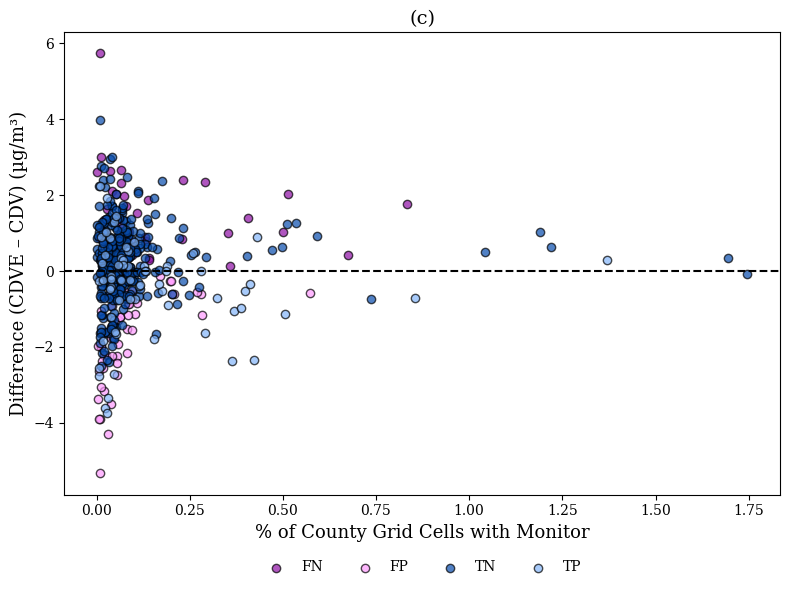

In [40]:
import matplotlib.pyplot as plt

# Define color mapping for classification
colors = {
    'TP': "#83b5fa",
    'FP': "#fe9bfe",
    'FN': "#8E0EA5",
    'TN': '#074cad'
}
plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in final_df.groupby('classification'):
    plt.scatter(
        group['monitor_coverage_pct'],  # x-axis
        group['diff'],                  # y-axis
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('% of County Grid Cells with Monitor', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
plt.title('(c)', fontsize=14)
plt.grid(False)

# Horizontal legend below plot
plt.legend(
    title=None,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()


In [29]:
merged_df_2 = merged_df_2.to_crs(epsg=5070)
highest_monitor = (
    merged_df_2.sort_values('Valid DV ', ascending=False)
    .drop_duplicates('GEOID')
    .rename(columns={'geometry': 'monitor_geom'})
    [['GEOID', 'Valid DV ', 'monitor_geom']]
)


In [30]:
grids.columns

Index(['value', 'lat', 'lon', 'geometry', 'index', 'GEOID', 'PM25_90th',
       'STATEFP', 'COUNTYFP', 'CDVE_rank', 'ID', 'Design Value', 'diff',
       'abs_diff', 'classification', 'monitor_count', 'area_km2'],
      dtype='object')

In [31]:
grids = grids.to_crs(epsg=5070)
highest_grid = (
    grids.sort_values('PM25_90th', ascending=False)
    .drop_duplicates('GEOID')
    .rename(columns={'geometry': 'grid_geom'})
    [['GEOID', 'PM25_90th', 'grid_geom']]
)


In [32]:
from shapely.geometry import Point

# Merge the two
comparison_df = highest_monitor.merge(highest_grid, on='GEOID', how='inner')

# Calculate distance in kilometers
comparison_df['dist_km'] = comparison_df.apply(
    lambda row: row['monitor_geom'].distance(row['grid_geom']) / 1000, axis=1
)


In [34]:
comparison_df

,GEOID,Valid DV,monitor_geom,PM25_90th,grid_geom,dist_km
0,06029,16.2,POINT (-2052716.001 1612722.111),12.599999,"POLYGON ((-1978374.627 1577513.337, -1978116.6...",82.031806
1,06107,15.7,POINT (-2053549.919 1726401.095),12.933334,"POLYGON ((-1967735.594 1672789.391, -1967476.0...",100.833209
2,06019,14.8,POINT (-2082457.024 1780242.623),11.466667,"POLYGON ((-2098761.407 1797635.846, -2098481.4...",23.098881
3,41039,14.4,POINT (-2096763.931 2599834.58),10.666667,"POLYGON ((-2108447.1 2641571.524, -2108137.262...",42.926262
4,06031,14.1,POINT (-2081860.318 1734409.768),12.433333,"POLYGON ((-2105419.9 1689485.065, -2105142.736...",49.435465
...,...,...,...,...,...,...
530,15003,3.7,POINT (-6145563.754 1900576.084),3.100000,"POLYGON ((-7113893.307 3879228.049, -7113051.2...",2201.938662
531,46065,3.6,POINT (-340623.525 2383672.105),6.600000,"POLYGON ((-345739.961 2389617.192, -345688.909...",7.321266
532,56013,3.5,POINT (-933133.847 2288596.962),5.200000,"POLYGON ((-1093011.63 2357580.654, -1092852.17...",173.348291
533,04012,3.4,POINT (-1595862.702 1390087.32),7.366667,"POLYGON ((-1582998.99 1367355.845, -1582795.73...",25.272456


In [54]:
final_plot_df = counties_with_monitor_counts[['GEOID', 'diff','classification']].merge(
    comparison_df[['GEOID', 'dist_km']], on='GEOID', how='inner'
)


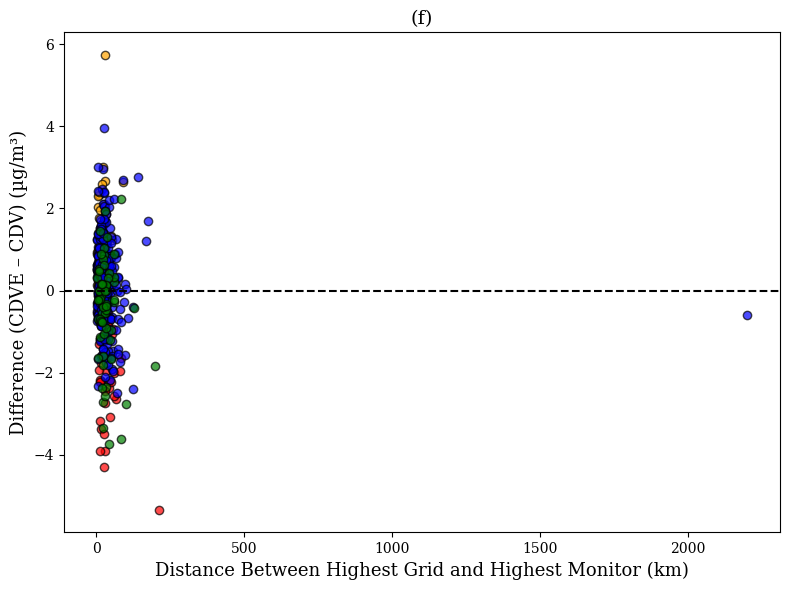

In [56]:
import matplotlib.pyplot as plt

# Define color mapping for classification
colors = {
    'TP': 'green',
    'FP': 'red',
    'FN': 'orange',
    'TN': 'blue'
}

plt.figure(figsize=(8, 6))

# Scatter plot grouped by classification
for label, group in final_plot_df.groupby('classification'):
    plt.scatter(
        group['dist_km'],  # x-axis
        group['diff'],                  # y-axis
        alpha=0.7,
        edgecolors='k',
        label=label,
        color=colors.get(label, 'gray')
    )

# Add horizontal line at y = 0
plt.axhline(0, linestyle='--', color='black')

# Labels and formatting
plt.rcParams["font.family"] = "serif"
plt.xlabel('Distance Between Highest Grid and Highest Monitor (km)', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
plt.title('(f)', fontsize=14)
plt.grid(False)

# Horizontal legend below plot
'''plt.legend(
    title=None,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.2),
    ncol=4,
    frameon=False
)'''

plt.tight_layout()
plt.show()
